In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.preprocessing import scale
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import KMeans
import seaborn as sns
from utilities import *
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
import pickle

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
qc = load_features_as_one(['data/QC/17302_CPU.QC.txt',
                          'data/QC/17302_LGN.QC.txt',
                          'data/QC/17302_Thalamuscells.QC.txt',
#                           'data/QC/17302_Lateral_Amygdala.QC.txt',
#                           'data/QC/17302_OlfactoryBulb.QC.txt',
                          ])
qc = qc.rename({"Percentage_lost(%)":"Percentage_unconnected(%)"}, axis='columns')
qc['Type'] = pd.Categorical(qc['Type'])

# Assign colors
celltypes = pd.DataFrame(qc['Type'])
u_celltypes = sorted(list(set(celltypes['Type'])))

my_pal = ['C'+str(i) for i in range(len(u_celltypes))]
lut = dict(zip(sorted(u_celltypes), my_pal))
colors = []
for tp in celltypes['Type'].tolist():
    colors.append(lut[tp])

# Select samples
sample_id = []
for i in range(len(qc)):
    tp_name = qc.index.tolist()[i]
    if((tp_name.find(".")<0) & (qc.loc[tp_name, "Percentage_unconnected(%)"]<5)):
        sample_id.append(tp_name)
print(len(sample_id))

74


72


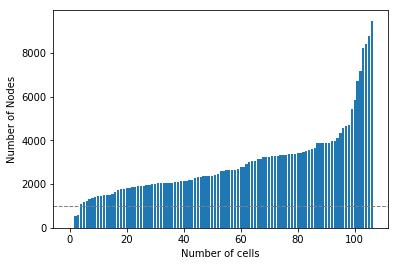

In [3]:
ddt = load_features_as_one(['data/features/17302_CPU.dendrite.features',
                          'data/features/17302_LGN.dendrite.features',
                          'data/features/17302_Thalamuscells.dendrite.features',
                           ],
                          drop_attr=['Soma Surface', 'Average Diameter', 'Total Volume', 'Total Surface'])

# Filter data
_ = plt.bar(range(len(ddt)), sorted(ddt['Number of Nodes']), )
plt.xlabel("Number of cells")
plt.ylabel("Number of Nodes")
plt.axhline(1000, c='grey', lw=1, linestyle='dashed')

sample_id = [sample_id[i] for i,j in enumerate(sample_id) if j in ddt.index.tolist()]
sample_id = [sample_id[i] for i,j in enumerate(sample_id) if ddt.loc[j, "Number of Nodes"]>1000]
print(len(sample_id))

70


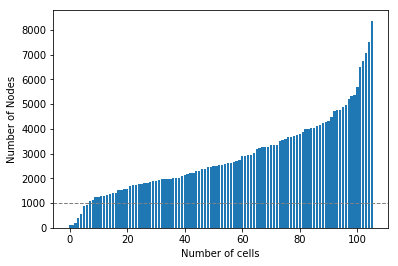

In [4]:
lpa = load_features_as_one(['data/features/17302_CPU.long_axon.features',
                          'data/features/17302_LGN.long_axon.features',
                          'data/features/17302_Thalamuscells.long_axon.features',
                           ])


# Filter data
_ = plt.bar(range(len(lpa)), sorted(lpa['Number of Nodes']), )
plt.xlabel("Number of cells")
plt.ylabel("Number of Nodes")
plt.axhline(1000, c='grey', lw=1, linestyle='dashed')

sample_id = [sample_id[i] for i,j in enumerate(sample_id) if j in lpa.index.tolist()]
sample_id = [sample_id[i] for i,j in enumerate(sample_id) if lpa.loc[j, "Number of Nodes"]>1000]
print(len(sample_id))

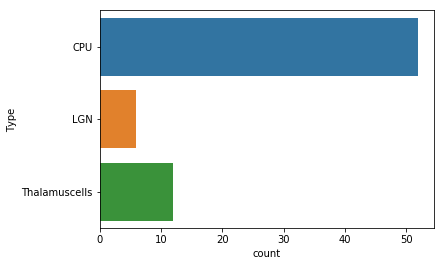

In [9]:
qc_sel = qc.loc[sample_id]
ddt_sel = ddt.loc[sample_id]
lpa_sel = lpa.loc[sample_id]
_ = sns.countplot(y="Type", palette=my_pal, data=qc_sel)

pickle.dump([qc_sel, ddt_sel, lpa_sel, sample_id], open("data/link/17302_features.pickle", 'wb'))